<a href="https://colab.research.google.com/github/TG0209/Mask_RCNN_Model/blob/main/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Training on custom dataset using MASK RCNN**

**Custom Dataset Link** : https://drive.google.com/drive/folders/16JIAHHxIwgHpFKKGey91UAzkViyx1w7L

**Classes** : Human, Mug, Key chain

**Dataset prepared at IIT Guwahati swimming pool**

Annotaions files for the dataset in developed using open source  annotation tool **label me by MIT**.

**ABOUT:**

The Mask Region-based Convolutional Neural Network, or Mask R-CNN, model is one of the state-of-the-art approaches for object recognition tasks. The Matterport Mask R-CNN project provides a library that allows you to develop and train Mask R-CNN Keras models for your own object detection tasks


**Step I :**

Link your google drive to your colab notebook



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


**Step II :**

Change to your respective directory where dataset is present.

In [ ]:
%cd /gdrive/My Drive/Colab Notebooks


/gdrive/My Drive/Colab Notebooks


**STEP III :**

**Installation of required libraries :**

**MASK RCNN**
1. Clone the github repository using below command.


In [ ]:
! git clone https://github.com/matterport/Mask_RCNN.git

2. Change directory into the Mask_RCNN directory and run the installation script.

In [ ]:
cd Mask_RCNN
python setup.py install

If everything went well then you will see a lot of successful installation messages ending with the following:

...
Finished processing dependencies for mask-rcnn==2.1

To confirm the library is installed correctly  query it via the pip command


In [ ]:
! pip show mask-rcnn

You should see output informing you of the version and installation location; for example:

Name: mask-rcnn

Version: 2.1

Summary: Mask R-CNN for object detection and instance segmentation

Home-page: https://github.com/matterport/Mask_RCNN

Author: Matterport

Author-email: waleed.abdulla@gmail.com

License: MIT

Location: ...

Requires:

Required-by:

**Tenserflow**

Requires TensorFlow version 1.14 or higher but does not work with TensorFlow 2.





In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.15 

**Keras**



In [ ]:
! pip install Keras==2.1.0

**Step IV:**




Import required libraries

**If any error occur during importing libraries copy the error and search online you will probably get the solution on stack overflow or through any other online resources.**

In [ ]:
import cv2
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.config import Config
from mrcnn.model import load_image_gt
from mrcnn.model import MaskRCNN
from tensorflow.keras import backend
from mrcnn.model import mold_image
from numpy import expand_dims
from numpy import mean
from mrcnn.utils import compute_ap
from numpy import expand_dims
from matplotlib.patches import Rectangle



Using TensorFlow backend.


**Step V:**

Define class AntahDataset to load the custom dataset.

**Make sure dataset is present in your current working directory.**

**load_dataset :**

It load the dataset definitions.Classes are defined by calling the built-in add_class() function and specifying the ‘source‘ (the name of the dataset), the ‘class_id‘ or integer for the class (e.g. 1 for the first lass as 0 is reserved for the background class), and the ‘class_name‘ (e.g. ‘HUMAN‘).

Test and train set is divided : images with image id  less and equal to 120 are training images and images having  image id greater than 120 are testing images.

Objects are defined by a call to the built-in add_image() function and specifying the ‘source‘ (the name of the dataset), a unique ‘image_id‘ (e.g. the filename without the file extension like ‘1‘), and the path for where the image can be loaded (e.g. ‘Images/frame1.jpg‘).

**extract_boxes :**

Open any annotaion file and get the idea of the information mentioned in the xml file.

Python provides the ElementTree API that can be used to load and parse an XML file and we can use the find() and findall() functions to perform the XPath queries on a loaded document.

findall() function with a query for ‘.//bndbox‘ to find all ‘bndbox‘ elements, then enumerate each to extract the x and y, min and max values that define each bounding box  and add class to bounding box.


**load_mask**

A mask is a two-dimensional array with the same dimensions as the photograph with all zero values where the object isn’t and all one values where the object is in the photograph.

We don’t have masks, but we do have bounding boxes. We can load the bounding boxes for a given photo and return them as masks. The library will then infer bounding boxes from our “masks” which will be the same size.Each bounding box is defined as min and max, x and y coordinates of the box.

**image_refrence**

This function is responsible for returning the path or URL for a given ‘image_id‘, which we know is just the ‘path‘ property on the ‘image info‘ dict.

Now, you have successfully defined a Dataset object for the mask-rcnn library for our custom dataset.

**custom_test**

A function to prepare a custom test dataset that includes images from each classes to get idea of accuracy and precision of prediction and detection on all the classes.


In [ ]:

class AntahDataset(Dataset):

	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
	
		# define one class
		self.add_class("dataset", 1, "HUMAN")
		# define two class
		self.add_class("dataset", 2, "MUG")
		# define three class
		self.add_class("dataset", 3, "KEYS")
	
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'
		# find all images
		for filename in listdir(images_dir):

			# extract image id
			
			image_id = filename[:-4]            
			image_id_1 = filename[5:-4]
     # split into train and test set          

			# skip all images after 120 if we are building the train set
			if is_train  and int(image_id_1) >= 110:
				continue
			# skip all images before 120 if we are building the test/val set
			if not is_train and int(image_id_1) < 110:
				continue
			
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path,class_ids=[0,1,2,3])

	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//object'):
			name = box.find('name').text
			xmin = int(box.find('./bndbox/xmin').text)
			ymin = int(box.find('./bndbox/ymin').text)
			xmax = int(box.find('./bndbox/xmax').text)
			ymax = int(box.find('./bndbox/ymax').text)
			coors = [xmin, ymin, xmax, ymax, name]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height

	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			box[4] = box[4].upper()
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			if (box[4] == 'HUMAN'):
						masks[row_s:row_e, col_s:col_e, i] = 1
						class_ids.append(self.class_names.index('HUMAN'))
			elif (box[4] == 'MUG'):
							masks[row_s:row_e, col_s:col_e, i] = 2
							class_ids.append(self.class_names.index('MUG'))
			else:
						masks[row_s:row_e, col_s:col_e, i] = 3
						class_ids.append(self.class_names.index('KEYS'))

		return masks, asarray(class_ids, dtype='int32')

	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']

	def custom_test(self, dataset_dir,image_ids):
	
		# define one class
		self.add_class("dataset", 1, "HUMAN")
		# define two class
		self.add_class("dataset", 2, "MUG")
		# define three class
		self.add_class("dataset", 3, "KEYS")
	
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'
	
		
		for i in image_ids :
				# find all images
				filename = 'frame' + str(i) +'.jpg'
				img_path = images_dir + filename
				ann_path = annotations_dir + 'frame' + str(i) + '.xml'
				# add to dataset
				self.add_image('dataset', image_id= str(i), path=img_path, annotation=ann_path,class_ids=[0,1,2,3])

**Step VI :**

prepares the train dataset and print the length of fit.

In [ ]:

# train set
train_set = AntahDataset()
train_set.load_dataset('DATASET', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

Train: 109


**Step VII :**

prepares the test dataset and print the length of fit.

In [ ]:
# test/val set
test_set = AntahDataset()
test_set.load_dataset('DATASET', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


Test: 36


**Step VIII :**

Test by loading an image via a call to the load_image() function with an image_id, then load the mask for the image via a call to the load_mask() function with the same image_id and by the mask-rcnn library  mrcnn.visualize.display_instances() function display a photograph with bounding boxes, masks, and class labels. This requires that the bounding boxes are extracted from the masks via the extract_boxes() function.

[2]
['BG', 'HUMAN', 'MUG', 'KEYS']


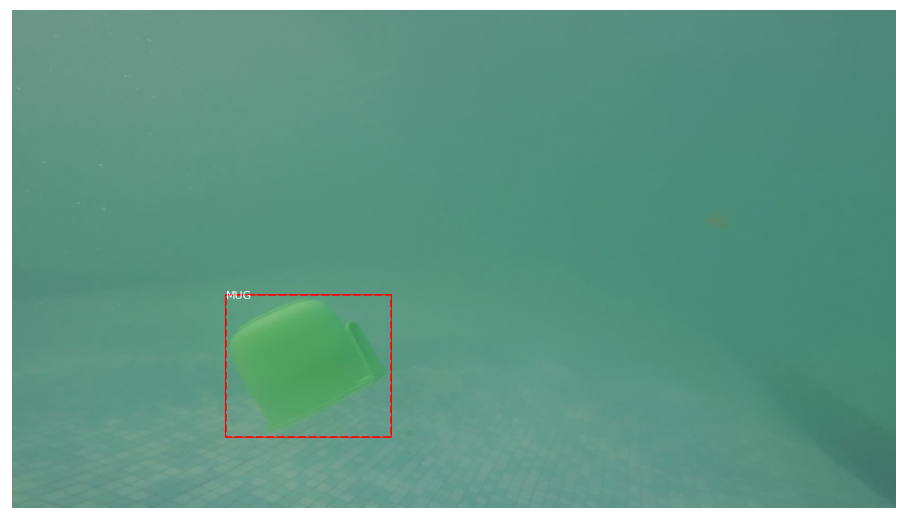

In [ ]:
image_id = 61
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
print(class_ids)
print(train_set.class_names)
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

 

**Step IX :**

A Mask R-CNN model can be fit from scratch, although like other computer vision applications, time can be saved and performance can be improved by using transfer learning.

The Mask R-CNN model pre-fit on the MS COCO object detection dataset can be used as a starting point and then tailored to the specific dataset, in this case, the Antahsagri custom dataset.

Download the model weights to a file with the name ‘mask_rcnn_coco.h5‘ in your current working directory.

[Download Weights (mask_rcnn_coco.h5) 246M](https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5)


Next, a configuration object for the model must be defined.

This is a new class that extends the mrcnn.config.Config class and defines properties of both the prediction problem (such as name and the number of classes) and the algorithm for training the model (such as the learning rate).

The configuration must define the name of the configuration via the **‘NAME‘** attribute, e.g. **‘Antah_cfg‘**, that will be used to save details and models to file during the run. The configuration must also define the number of classes in the prediction problem via the **‘NUM_CLASSES‘** attribute.

Finally, we must define the number of samples (photos) used in each training epoch. This will be the number of photos in the training dataset, in this case, 109.

In [ ]:
# define a configuration for the model
class AntahConfig(Config):
	# define the name of the configuration
	NAME = "Antah_cfg"
	# number of classes (background + HUMAN + MUG + KEYS)
	NUM_CLASSES = 1 + 1 + 1 + 1
	# number of training steps per epoch
	STEPS_PER_EPOCH = 109
 

**Step X :**

**Define the model**

This is achieved by creating an instance of the mrcnn.model.MaskRCNN class and specifying the model will be used for training via setting the ‘mode‘ argument to ‘training‘.

The ‘config‘ argument must also be specified with an instance of our AntahConfig class.

Finally, a directory is needed where configuration files can be saved and where checkpoint models can be saved at the end of each epoch. We will use the current working directory.

Next, the pre-defined model architecture and weights can be loaded. This can be achieved by calling the load_weights() function on the model and specifying the path to the downloaded **‘mask_rcnn_coco.h5‘** file.

Next, the model can be fit on the training dataset by calling the train() function and passing in both the training dataset and the validation dataset. We can also specify the learning rate as the default learning rate in the configuration (0.001).

We can also specify what layers to train. In this case, we will only train the heads, that is the output layers of the model.

A model file is created and saved at the end of each epoch in a subdirectory that starts with ‘Antah_cfg‘ followed by random characters.

**Don't forget to select runtime type as GPU otherwise it will take a very long time.....** 

In [ ]:
# prepare config
config = AntahConfig()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights('HUMAN/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2039: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/5
108/109 [============================>.] - ETA: 2s - loss: 1.0919 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.1130 - mrcnn_class_loss: 0.1421 - mrcnn_bbox_loss: 0.3716 - mrcnn_mask_loss: 0.4609

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2197: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



109/109 [==============================] - 402s 4s/step - loss: 1.0875 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.1140 - mrcnn_class_loss: 0.1410 - mrcnn_bbox_loss: 0.3696 - mrcnn_mask_loss: 0.4586 - val_loss: 5.7371 - val_rpn_class_loss: 0.2005 - val_rpn_bbox_loss: 4.5999 - val_mrcnn_class_loss: 0.0141 - val_mrcnn_bbox_loss: 0.6256 - val_mrcnn_mask_loss: 0.2971
Epoch 2/5
109/109 [==============================] - 306s 3s/step - loss: 0.4204 - rpn_class_loss: 8.4947e-04 - rpn_bbox_loss: 0.0749 - mrcnn_class_loss: 0.0109 - mrcnn_bbox_loss: 0.1495 - mrcnn_mask_loss: 0.1842 - val_loss: 7.9018 - val_rpn_class_loss: 0.3379 - val_rpn_bbox_loss: 6.9403 - val_mrcnn_class_loss: 0.0092 - val_mrcnn_bbox_loss: 0.3289 - val_mrcnn_mask_loss: 0.2856
Epoch 3/5
109/109 [==============================] - 307s 3s/step - loss: 0.3037 - rpn_class_loss: 7.4756e-04 - rpn_bbox_loss: 0.0574 - mrcnn_class_loss: 0.0076 - mrcnn_bbox_loss: 0.0932 - mrcnn_mask_loss: 0.1448 - val_loss: 7.8325 - val_rpn_class_loss:

**Step XI :**

**Evaluating the model**

The performance of a model for an object recognition task is often evaluated using the mean absolute precision, or mAP.

We are predicting bounding boxes so we can determine whether a bounding box prediction is good or not based on how well the predicted and actual bounding boxes overlap. This can be calculated by dividing the area of the overlap by the total area of both bounding boxes, or the intersection divided by the union, referred to as “intersection over union,” or IoU. A perfect bounding box prediction will have an IoU of 1.

It is standard to assume a positive prediction of a bounding box if the IoU is greater than 0.5, e.g. they overlap by 50% or more.

The mask-rcnn library provides a mrcnn.utils.compute_ap to calculate the AP and other metrics for a given images. These AP scores can be collected across a dataset and the mean calculated to give an idea at how good the model is at detecting objects in a dataset.

Define a new Config object to use for making predictions. The new object will have the same value as the AntahConfig object  with some changed  defaults around using the GPU for inference that are different from how they are set for training a model (regardless of whether you are running on the GPU or CPU).


In [ ]:

# define the prediction configuration
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "Antah_cfg"
	# number of classes (background + HUMAN + MUG + KEYS)
	NUM_CLASSES = 1 + 1 + 1 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

**Step XII :**

Next, define the model with the config and set the ‘mode‘ argument to ‘inference‘ instead of ‘training‘.

 Load the weights from our saved model.We can do that by specifying the path to the model file. In this case, the model file is ‘mask_rcnn_antah_config_0005.h5‘ under the folder named 'antah_cfg.....' in the current working directory.

 Next, we can evaluate the model:-

* This involves enumerating the images in a dataset, making a prediction, and calculating the AP for the prediction before predicting a mean AP across all images.
* Image and ground truth mask is loaded from the dataset for a given image_id using the load_image_gt() convenience function.


* The pixel values of the loaded image will be scaled in the same way as was performed on the training data, e.g. centered. This can be achieved using the mold_image() convenience function.

* The dimensions of the image then need to be expanded one sample in a dataset and used as input to make a prediction with the model using expand_dims() and model.detect() functions.



* The prediction can be compared to the ground truth and metrics calculated using the compute_ap() function. The AP values can be added to a list, then the mean value calculated.

* the evaluate_model() function below implements this and calculates the mAP given a dataset, model and configuration.















 



In [ ]:
# calculate the mAP for a model on a given dataset
def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
		# load image, bounding boxes and masks for the image id
		image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
		# convert pixel values (e.g. center)
		scaled_image = mold_image(image, cfg)
		# convert image into one sample
		sample = expand_dims(scaled_image, 0)
		# make prediction
		yhat = model.detect(sample, verbose=0)
		# extract results for first sample
		r = yhat[0]
		# calculate statistics, including AP
		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		# store
		APs.append(AP)
	# calculate the mean AP across all images
	mAP = mean(APs)
	return mAP

**Step XIII :**

 calculate the mAP for the model on the train and test datasets.

In [ ]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model.load_weights('antah_cfg20200727T0555/mask_rcnn_antah_cfg_0005.h5', by_name=True)
#evaluate model on training dataset
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)
#evaluate model on test dataset
test_mAP = evaluate_model(test_set, model, cfg)
print("Test mAP: %.3f" % test_mAP)



Instructions for updating:
Use `tf.cast` instead.
Train mAP: 1.000
Test mAP: 0.871


**Step XIV :**

**Detection on new photos**

We can use the trained model to detect defined classes (Human,Mug,Keys) in new photographs.

we will make predictions for a number of images in a dataset, then plot the photo with bounding boxes side-by-side with the photo and the predicted bounding boxes. This will provide a visual guide to how good the model is at making predictions.



* Load the image and mask from the dataset.
* Make a prediction for the image.
* Create a subplot for the ground truth and plot the image with the known bounding boxes.
* Create a second subplot beside the first and plot the first, plot the photo again, and this time draw the predicted bounding boxes in red.
* We can tie all of this together into a function that takes a dataset, model, and config and creates a plot of the first five photos in the dataset with ground truth and predicted bound boxes.








In [ ]:
# plot a number of photos with ground truth and predictions
def plot_actual_vs_predicted(dataset, model, cfg, n_images=5, is_true = True):
    arr = ['BG','HUMAN','MUG','KEY']
    # load image and mask
    for i in range(n_images):
      # load the image and mask
      image = dataset.load_image(i)
      #if image is present in the dataset
      if is_true :
        mask, class_ids = dataset.load_mask(i)
      # convert pixel values (e.g. center)
      scaled_image = mold_image(image, cfg)
      # convert image into one sample
      sample = expand_dims(scaled_image, 0)
      # make prediction
      yhat = model.detect(sample, verbose=0)[0]
      # define subplot
      pyplot.subplot(n_images, 2, i*2+1)
      # plot raw pixel data
      pyplot.imshow(image)
      pyplot.title('Actual')
      # plot masks
      if is_true :
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
      # get the context for drawing boxes
      pyplot.subplot(n_images, 2, i*2+2)
      # plot raw pixel data
      pyplot.imshow(image)
      pyplot.title('Predicted')
      if is_true :
        pyplot.title('class : ' + arr[class_ids[0]])
      ax = pyplot.gca()
      # plot each box
      for box in yhat['rois']:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the figure
    pyplot.show()

**Step XV :**

Predict for train and test datsets.

Prepare a custom set of images to get predictions on all classes using the custom_test function defined under AntahDataset class.

Test: 5
Test: 5


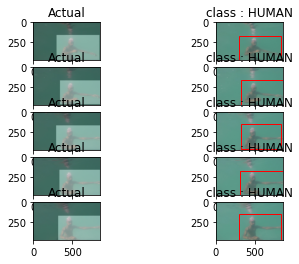

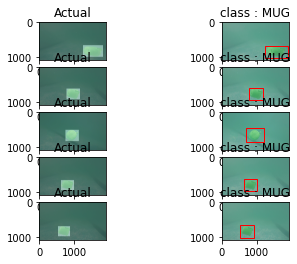

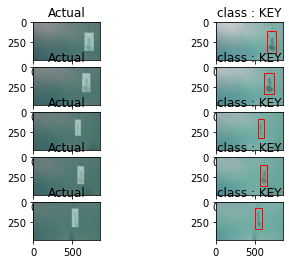

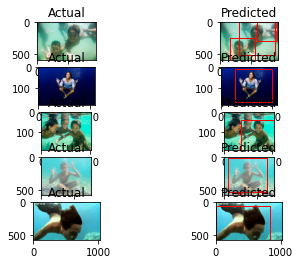

In [ ]:

# prepare custom test/val set
test_set_c = AntahDataset()
test_set_c.custom_test('DATASET', [95, 96, 97, 98, 100])
test_set_c.prepare()
print('Test: %d' % len(test_set_c.image_ids))
x = len(test_set_c.image_ids)

# prepare custom test/val set for images other than test and train dataset
test_set_cc = AntahDataset()
test_set_cc.custom_test('DATASET', [141, 142, 143, 144, 145])
test_set_cc.prepare()
print('Test: %d' % len(test_set_cc.image_ids))
y = len(test_set_cc.image_ids)

# plot predictions for train dataset
plot_actual_vs_predicted(train_set, model, cfg)
# plot predictions for test dataset
plot_actual_vs_predicted(test_set, model, cfg)
# plot predictions for custom test dataset
plot_actual_vs_predicted(test_set_c, model, cfg, x)
# plot predictions for images other than train and test dataset
plot_actual_vs_predicted(test_set_cc, model, cfg, y,False)